In [233]:
%matplotlib notebook

In [234]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import FuncFormatter


In [235]:
plot_df = pd.read_csv("../scatter_regression_census/output/top_ten.csv")
plot_df = plot_df.drop(['Unnamed: 0'], axis=1)
plot_df

,State,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,Households with Internet,Households with Just Cell Data Plan,Households with DSL or Fiber Optic,Households with Broadband Any Type,Households with Celular Data Plan,Households with Just DSL or Fiber Optic,Households with Satellite Internet,Households with Just Satellite Internet,Households with No Internet
0,6,"Los Angeles County, California",10105722.0,36.0,61015.0,30798.0,1688505.0,16.708405,4.021741,3295198.0,220563.0,2306545.0,2633021.0,1680314.0,865663.0,199009.0,31351.0,538359.0
1,17,"Cook County, Illinois",5238541.0,36.4,59426.0,33722.0,821572.0,15.683222,4.592977,1956561.0,135811.0,1319255.0,1500290.0,986543.0,465829.0,89105.0,13312.0,359116.0
2,48,"Harris County, Texas",4525519.0,33.1,57791.0,30856.0,751985.0,16.616547,3.296683,1562813.0,183317.0,999605.0,1225570.0,848627.0,345502.0,82925.0,12605.0,275630.0
3,4,"Maricopa County, Arizona",4155501.0,36.0,58580.0,30186.0,644476.0,15.508984,2.989050,1489533.0,109769.0,1058044.0,1216868.0,773917.0,400895.0,94168.0,18396.0,216082.0
4,6,"San Diego County, California",3283665.0,35.4,70588.0,34350.0,427031.0,13.004707,3.555722,1111739.0,62443.0,876765.0,966430.0,645331.0,293588.0,70951.0,9144.0,118026.0
5,6,"Orange County, California",3155816.0,37.5,81851.0,37603.0,378459.0,11.992429,3.043238,1024976.0,65346.0,809341.0,899047.0,595764.0,281067.0,55099.0,6522.0,97075.0
6,12,"Miami-Dade County, Florida",2702602.0,39.5,46338.0,25481.0,505182.0,18.692430,3.735955,858289.0,58131.0,551091.0,627883.0,342068.0,263935.0,44337.0,8004.0,193906.0
7,36,"Kings County, New York",2635121.0,34.8,52782.0,29928.0,570731.0,21.658626,4.059624,944650.0,51781.0,645169.0,711897.0,411665.0,281626.0,26654.0,3888.0,200226.0
8,48,"Dallas County, Texas",2552213.0,33.3,53626.0,29810.0,446611.0,17.498971,3.081287,906179.0,92944.0,571741.0,692870.0,457642.0,201750.0,41337.0,6080.0,182720.0
9,6,"Riverside County, California",2355002.0,35.0,60807.0,25700.0,362215.0,15.380666,4.559784,711724.0,49560.0,515473.0,588200.0,369086.0,195954.0,45073.0,7686.0,101093.0


In [236]:
plot_df.dtypes

State                                        int64
Name                                        object
Population                                 float64
Median Age                                 float64
Household Income                           float64
Per Capita Income                          float64
Poverty Count                              float64
Poverty Rate                               float64
Unemployment Rate                          float64
Households with Internet                   float64
Households with Just Cell Data Plan        float64
Households with DSL or Fiber Optic         float64
Households with Broadband Any Type         float64
Households with Celular Data Plan          float64
Households with Just DSL or Fiber Optic    float64
Households with Satellite Internet         float64
Households with Just Satellite Internet    float64
Households with No Internet                float64
dtype: object

In [237]:
plot_df = plot_df[[    
                       #"State", 
                       "Name", 
                       #"Population", 
                       #"Median Age", 
                       #"Household Income",
                       #"Per Capita Income", 
                       #"Poverty Count", 
                       #"Poverty Rate", 
                       #"Unemployment Rate", 
                       "Households with Internet", 
                       #"Households with Just Cell Data Plan",
                       "Households with DSL or Fiber Optic",
                       #"Households with Broadband Any Type",
                       "Households with Celular Data Plan",
                       #"Households with Just DSL or Fiber Optic",
                       "Households with Satellite Internet",
                       #"Households with Just Satellite Internet",
                       "Households with No Internet"
                      ]]

plot_df

,Name,Households with Internet,Households with DSL or Fiber Optic,Households with Celular Data Plan,Households with Satellite Internet,Households with No Internet
0,"Los Angeles County, California",3295198.0,2306545.0,1680314.0,199009.0,538359.0
1,"Cook County, Illinois",1956561.0,1319255.0,986543.0,89105.0,359116.0
2,"Harris County, Texas",1562813.0,999605.0,848627.0,82925.0,275630.0
3,"Maricopa County, Arizona",1489533.0,1058044.0,773917.0,94168.0,216082.0
4,"San Diego County, California",1111739.0,876765.0,645331.0,70951.0,118026.0
5,"Orange County, California",1024976.0,809341.0,595764.0,55099.0,97075.0
6,"Miami-Dade County, Florida",858289.0,551091.0,342068.0,44337.0,193906.0
7,"Kings County, New York",944650.0,645169.0,411665.0,26654.0,200226.0
8,"Dallas County, Texas",906179.0,571741.0,457642.0,41337.0,182720.0
9,"Riverside County, California",711724.0,515473.0,369086.0,45073.0,101093.0


In [238]:

plot_df = plot_df.rename(columns={
                                  "Name": "County", 
                                  "Households with Internet": "HH with Internet",
                                  "Households with Celular Data Plan": "HH with Celular Data Plan",
                                  "Households with DSL or Fiber Optic": "HH with DSL or Fiber Optic",
                                  "Households with Satellite Internet": "HH with Satellite Internet",
                                  "Households with No Internet": "HH with No Internet",
    
                                 })

plot_df

,County,HH with Internet,HH with DSL or Fiber Optic,HH with Celular Data Plan,HH with Satellite Internet,HH with No Internet
0,"Los Angeles County, California",3295198.0,2306545.0,1680314.0,199009.0,538359.0
1,"Cook County, Illinois",1956561.0,1319255.0,986543.0,89105.0,359116.0
2,"Harris County, Texas",1562813.0,999605.0,848627.0,82925.0,275630.0
3,"Maricopa County, Arizona",1489533.0,1058044.0,773917.0,94168.0,216082.0
4,"San Diego County, California",1111739.0,876765.0,645331.0,70951.0,118026.0
5,"Orange County, California",1024976.0,809341.0,595764.0,55099.0,97075.0
6,"Miami-Dade County, Florida",858289.0,551091.0,342068.0,44337.0,193906.0
7,"Kings County, New York",944650.0,645169.0,411665.0,26654.0,200226.0
8,"Dallas County, Texas",906179.0,571741.0,457642.0,41337.0,182720.0
9,"Riverside County, California",711724.0,515473.0,369086.0,45073.0,101093.0


In [239]:
states = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Palau': 'PW',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [240]:
# Creating a new dataframe to split the Metropolitan areas
plot_df["County"] = plot_df["County"].apply(lambda x: x.replace(" County",""))
new = plot_df["County"].str.split(", ", n = 1, expand = True) 
# Change the state names by its abrebbiation
new[1] = new[1].map(states)

# Merge the city name with the state abbreviation
plot_df["County"] = new[0] + ", " + new[1]
plot_df

,County,HH with Internet,HH with DSL or Fiber Optic,HH with Celular Data Plan,HH with Satellite Internet,HH with No Internet
0,"Los Angeles, CA",3295198.0,2306545.0,1680314.0,199009.0,538359.0
1,"Cook, IL",1956561.0,1319255.0,986543.0,89105.0,359116.0
2,"Harris, TX",1562813.0,999605.0,848627.0,82925.0,275630.0
3,"Maricopa, AZ",1489533.0,1058044.0,773917.0,94168.0,216082.0
4,"San Diego, CA",1111739.0,876765.0,645331.0,70951.0,118026.0
5,"Orange, CA",1024976.0,809341.0,595764.0,55099.0,97075.0
6,"Miami-Dade, FL",858289.0,551091.0,342068.0,44337.0,193906.0
7,"Kings, NY",944650.0,645169.0,411665.0,26654.0,200226.0
8,"Dallas, TX",906179.0,571741.0,457642.0,41337.0,182720.0
9,"Riverside, CA",711724.0,515473.0,369086.0,45073.0,101093.0


In [266]:
max(y_axis_1)

3295198.0

In [271]:
round(max(y_axis_1),-6)+1000000

4000000.0

<IPython.core.display.Javascript object>


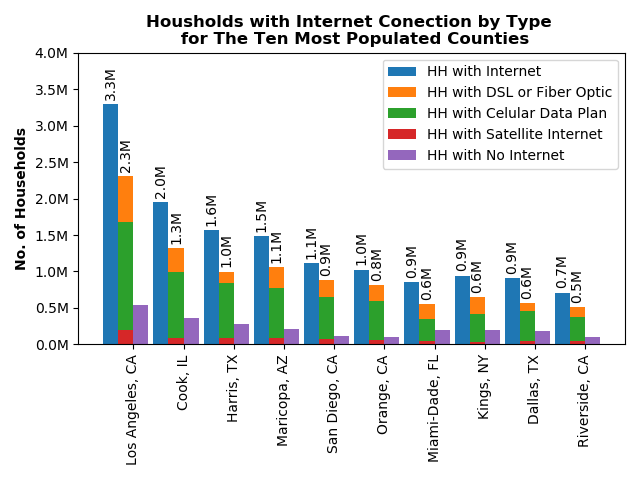

In [278]:
labels = plot_df["County"]
y_axis_1 = plot_df["HH with Internet"]
y_axis_2 = plot_df["HH with DSL or Fiber Optic"]
y_axis_3 = plot_df["HH with Celular Data Plan"]
y_axis_4 = plot_df["HH with Satellite Internet"]
y_axis_5 = plot_df["HH with No Internet"]

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - 1.5*width, y_axis_1, width, label='HH with Internet')
rects2 = ax.bar(x - 0.5*width, y_axis_2, width, label='HH with DSL or Fiber Optic')
rects3 = ax.bar(x - 0.5*width, y_axis_3, width, label='HH with Celular Data Plan')
rects4 = ax.bar(x - 0.5*width, y_axis_4, width, label='HH with Satellite Internet')
rects5 = ax.bar(x + 0.5*width, y_axis_5, width, label='HH with No Internet')



def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('No. of Households',fontweight="bold")
ax.set_title('Housholds with Internet Conection by Type \n for The Ten Most Populated Counties',fontweight="bold")
ax.set_xticks(x)
ax.set_xticklabels(labels , rotation=90)
ax.yaxis.set_major_formatter(formatter)
ax.legend()
plt.ylim([0, round(max(y_axis_1),-6)+1000000])

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:,.1f}M'.format(height/1000000),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=90)

        
        


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()
# Save Plot
plt.savefig("Fig 1. Housholds with Internet Conection by Type" +'.png',bbox_inches='tight')